###### √ https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972
###### https://medium.com/@ianforrest11/graphing-latitudes-and-longitudes-on-a-map-bf64d5fca391


https://prataplyf.medium.com/visualizing-latitude-and-longitude-on-google-map-using-python-3d567898c328    
https://kanoki.org/python-plotting-latitude-and-longitude-from-csv-on-map-using-basemap-folium-geopandas-and-plotly    
https://python.plainenglish.io/using-folium-to-map-latitude-and-longitude-491f8dcc81ad

Shape file
### https://data.cityofnewyork.us/Housing-Development/Shapefiles-and-base-map/2k7f-6s2k

1. Problem

- indetifying the crime rate, location, in NYC
- plot the crime on a map

2. EDA - getting insights

3. Model

Learning Github

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from plotly.offline import download_plotlyjs, init_notebook_mode , plot,iplot
import plotly.express as px
import plotly.graph_objects as go

from plotly.colors import n_colors
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
import folium
from folium import plugins

In [2]:
NYC_df = pd.read_csv('NYPD_Shooting_Incident_Data__Historic_.csv')
#LA_df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')

In [3]:
NYC_df.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,...,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,228798151,05/27/2021,21:30:00,QUEENS,NaN,105,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1.058925e+06,180924.000000,40.662965,-73.730839,POINT (-73.73083868899994 40.662964620000025)
1,137471050,06/27/2014,17:40:00,BRONX,NaN,40,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1.005028e+06,234516.000000,40.810352,-73.924942,POINT (-73.92494232599995 40.81035186300006)
2,147998800,11/21/2015,03:56:00,QUEENS,NaN,108,0.0,NaN,NaN,True,...,NaN,NaN,25-44,M,WHITE,1.007668e+06,209836.531250,40.742607,-73.915492,POINT (-73.91549174199997 40.74260663300004)
3,146837977,10/09/2015,18:30:00,BRONX,NaN,44,0.0,NaN,NaN,False,...,NaN,NaN,<18,M,WHITE HISPANIC,1.006537e+06,244511.140625,40.837782,-73.919457,POINT (-73.91945661499994 40.83778200300003)
4,58921844,02/19/2009,22:58:00,BRONX,NaN,47,0.0,NaN,NaN,True,...,M,BLACK,45-64,M,BLACK,1.024922e+06,262189.406250,40.886238,-73.852910,POINT (-73.85290950899997 40.88623791800006)


In [4]:
shp_NYC = gpd.read_file('../NYC shape files/geo_export_61679f34-d09e-4403-a90a-1ebff2dd1bf9.shp')

In [5]:
shp_NYC

,bbl,bin,built_code,cnstrct_yr,doitt_id,feat_code,groundelev,heightroof,date_lstmo,time_lstmo,lststatype,name,num_floors,shape_area,shape_len,sub_code,geometry
0,4155980564,4462384.0,NaN,2001.0,939203.0,2100.0,6.0,26.528549,2005-05-31,00:00:00.000,Constructed,NaN,2.0,1768.567205,169.940373,210000.0,"POLYGON ((-73.74251 40.59909, -73.74259 40.599..."
1,4163500400,4467306.0,E,1938.0,107990.0,2100.0,8.0,17.947245,2009-02-14,00:00:00.000,Constructed,NaN,1.0,1105.077843,148.987698,210000.0,"POLYGON ((-73.92091 40.55837, -73.92092 40.558..."
2,4160290023,4529256.0,E,1920.0,931167.0,5110.0,6.0,14.242061,2009-02-14,00:00:00.000,Constructed,NaN,2.0,402.928037,80.661670,511000.0,"POLYGON ((-73.79829 40.59817, -73.79837 40.598..."
3,4163250001,4540232.0,NaN,0.0,86053.0,2100.0,16.0,14.529231,2013-09-19,00:00:00.000,Constructed,NaN,2.0,668.812178,108.680772,210000.0,"POLYGON ((-73.87743 40.56522, -73.87749 40.565..."
4,4160900043,4530675.0,NaN,2004.0,998592.0,2100.0,7.0,42.447070,2010-07-26,00:00:00.000,Constructed,NaN,3.0,1094.409581,146.076029,210000.0,"POLYGON ((-73.80335 40.58943, -73.80343 40.589..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082344,1270029880,1795020.0,NaN,2016.0,1273171.0,2110.0,0.0,0.000000,2016-06-22,00:00:00.000,Constructed,NaN,0.0,1075.117146,208.468726,211000.0,"POLYGON ((-73.98406 40.77375, -73.98402 40.773..."
1082345,2270029999,2795001.0,NaN,2016.0,1273175.0,2110.0,41.0,91.930000,2016-06-22,00:00:00.000,Constructed,NaN,0.0,3101.206406,297.302815,211000.0,"POLYGON ((-73.92751 40.81759, -73.92754 40.817..."
1082346,1014890008,1795027.0,NaN,1900.0,1273172.0,2110.0,0.0,0.000000,2016-06-22,00:00:00.000,Constructed,NaN,6.0,98.707606,61.552649,211000.0,"POLYGON ((-73.95002 40.76987, -73.94997 40.769..."
1082347,1270029999,1795001.0,NaN,2016.0,1273167.0,2110.0,0.0,0.000000,2016-06-22,00:00:00.000,Constructed,NaN,0.0,119.192516,50.783825,211000.0,"POLYGON ((-74.00948 40.71822, -74.00941 40.718..."


In [7]:
NYC_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27312 entries, 0 to 27311
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   INCIDENT_KEY             27312 non-null  int64  
 1   OCCUR_DATE               27312 non-null  object 
 2   OCCUR_TIME               27312 non-null  object 
 3   BORO                     27312 non-null  object 
 4   LOC_OF_OCCUR_DESC        1716 non-null   object 
 5   PRECINCT                 27312 non-null  int64  
 6   JURISDICTION_CODE        27310 non-null  float64
 7   LOC_CLASSFCTN_DESC       1716 non-null   object 
 8   LOCATION_DESC            12335 non-null  object 
 9   STATISTICAL_MURDER_FLAG  27312 non-null  bool   
 10  PERP_AGE_GROUP           17968 non-null  object 
 11  PERP_SEX                 18002 non-null  object 
 12  PERP_RACE                18002 non-null  object 
 13  VIC_AGE_GROUP            27312 non-null  object 
 14  VIC_SEX               

In [8]:
NYC_df.describe()

,INCIDENT_KEY,PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,2.731200e+04,27312.000000,27310.000000,2.731200e+04,27312.000000,27302.000000,27302.000000
mean,1.208605e+08,65.635362,0.326913,1.009449e+06,208127.401608,40.737892,-73.909051
std,7.341286e+07,27.305705,0.737743,1.837783e+04,31886.377757,0.087525,0.066272
min,9.953245e+06,1.000000,0.000000,9.149281e+05,125756.718750,40.511586,-74.249303
25%,6.386088e+07,44.000000,0.000000,1.000029e+06,182834.335938,40.668481,-73.943027
50%,9.037222e+07,68.000000,0.000000,1.007731e+06,194486.570312,40.700318,-73.915221
75%,1.888102e+08,81.000000,0.000000,1.016838e+06,239518.468750,40.824067,-73.882330
max,2.611902e+08,123.000000,2.000000,1.066815e+06,271127.687500,40.910818,-73.702046


In [9]:
NYC_df.isnull().sum()

INCIDENT_KEY                   0
OCCUR_DATE                     0
OCCUR_TIME                     0
BORO                           0
LOC_OF_OCCUR_DESC          25596
PRECINCT                       0
JURISDICTION_CODE              2
LOC_CLASSFCTN_DESC         25596
LOCATION_DESC              14977
STATISTICAL_MURDER_FLAG        0
PERP_AGE_GROUP              9344
PERP_SEX                    9310
PERP_RACE                   9310
VIC_AGE_GROUP                  0
VIC_SEX                        0
VIC_RACE                       0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                      10
Longitude                     10
Lon_Lat                       10
dtype: int64

In [10]:
NYC_df.nunique()

INCIDENT_KEY               21420
OCCUR_DATE                  5761
OCCUR_TIME                  1421
BORO                           5
LOC_OF_OCCUR_DESC              2
PRECINCT                      77
JURISDICTION_CODE              3
LOC_CLASSFCTN_DESC             9
LOCATION_DESC                 40
STATISTICAL_MURDER_FLAG        2
PERP_AGE_GROUP                10
PERP_SEX                       4
PERP_RACE                      8
VIC_AGE_GROUP                  7
VIC_SEX                        3
VIC_RACE                       7
X_COORD_CD                 12088
Y_COORD_CD                 12283
Latitude                   12627
Longitude                  12617
Lon_Lat                    12645
dtype: int64

# ONE VARIABLE ANALYSIS

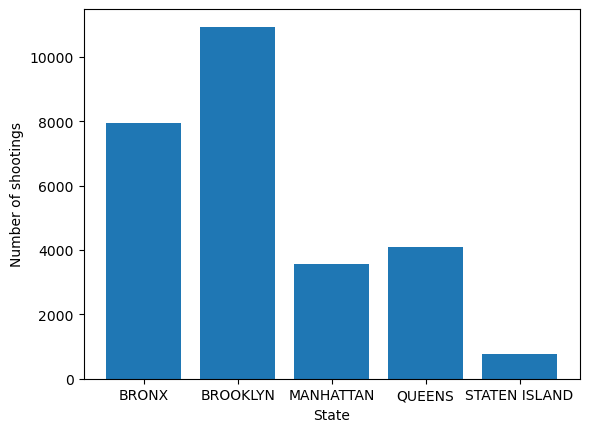

<Figure size 1000x4000 with 0 Axes>

In [45]:
# Get the number of shootings per state
state_shootings = NYC_df.groupby("BORO").size()
# Plot the data
plt.bar(state_shootings.index, state_shootings.values)
plt.xlabel("State")
plt.ylabel("Number of shootings")
plt.figure(figsize=(10,40))
plt.show()


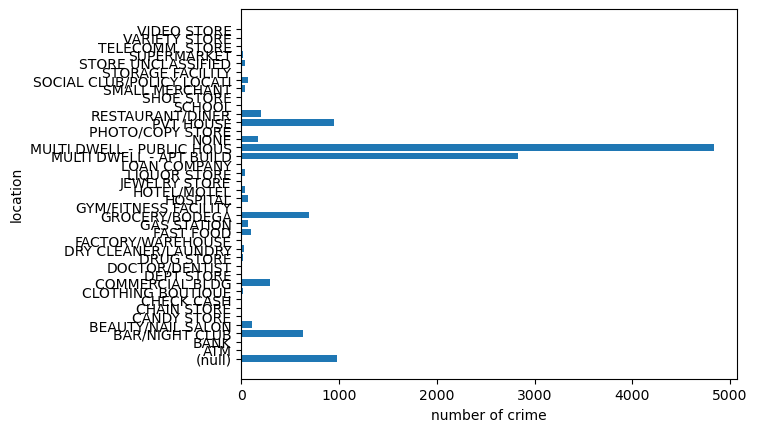

<Figure size 2000x2000 with 0 Axes>

In [75]:
# Get the number of shootings per locoation
Location_shootings = NYC_df.groupby("LOCATION_DESC").size()
# Plot the data
plt.barh(Location_shootings.index, Location_shootings.values)
plt.xlabel("number of crime")
plt.ylabel("location")
# Resize the plot
plt.figure(figsize=(20,20))
plt.show()


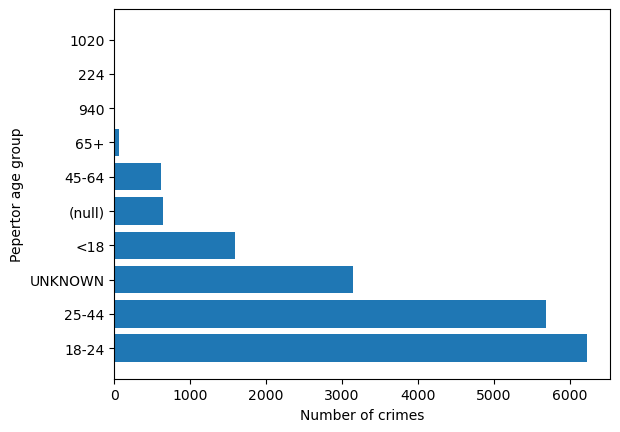

In [76]:
# Count the number of times each continent occurs
Age_counts = NYC_df["PERP_AGE_GROUP"].value_counts()
# Plot the results
plt.barh(Age_counts.index, Age_counts.values)
plt.xlabel("Number of crimes")
plt.ylabel("Pepertor age group")

# Show the plot
plt.show()

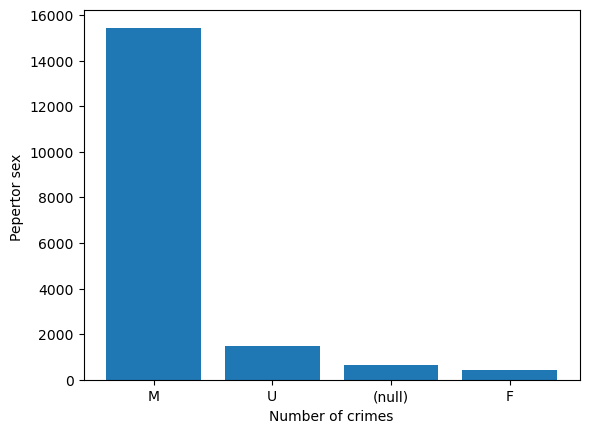

In [69]:
# Count the number of times each continent occurs
sex_counts = NYC_df["PERP_SEX"].value_counts()
# Plot the results
plt.bar(sex_counts.index, sex_counts.values)
plt.xlabel("Number of crimes")
plt.ylabel("Pepertor sex ")

# Show the plot
plt.show()

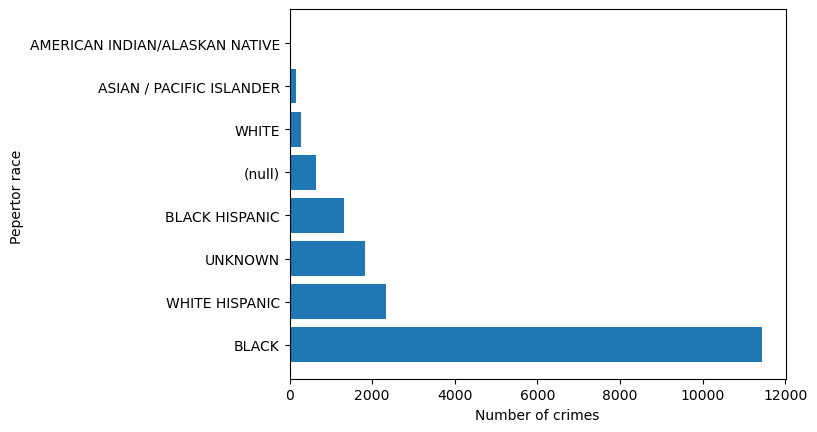

In [71]:
# Count the number of times each continent occurs
race_counts = NYC_df["PERP_RACE"].value_counts()
# Plot the results
plt.barh(race_counts.index, race_counts.values)
plt.xlabel("Number of crimes")
plt.ylabel("Pepertor race ")

# Show the plot
plt.show()

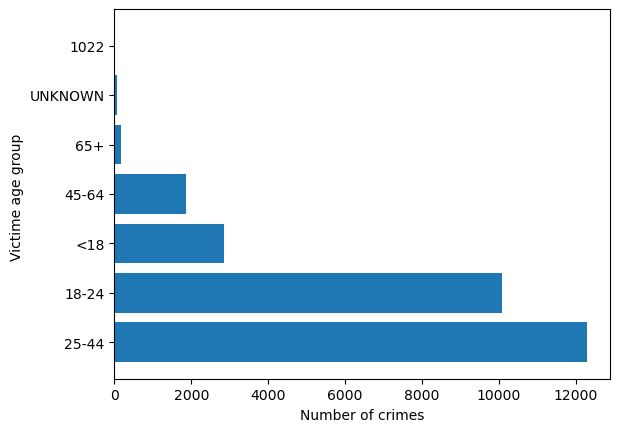

In [72]:
# Count the number of times each continent occurs
Victime_counts = NYC_df["VIC_AGE_GROUP"].value_counts()
# Plot the results
plt.barh(Victime_counts.index, Victime_counts.values)
plt.xlabel("Number of crimes")
plt.ylabel("Victime age group ")

# Show the plot
plt.show()



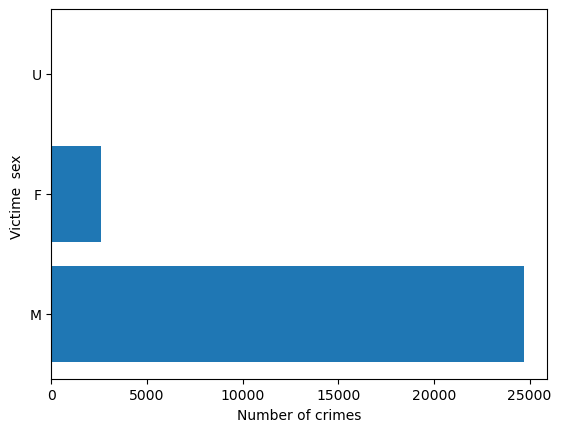

In [73]:
# Count the number of times each continent occurs
Victimesex_counts = NYC_df["VIC_SEX"].value_counts()
# Plot the results
plt.barh(Victimesex_counts.index, Victimesex_counts.values)
plt.xlabel("Number of crimes")
plt.ylabel("Victime  sex ")

# Show the plot
plt.show()

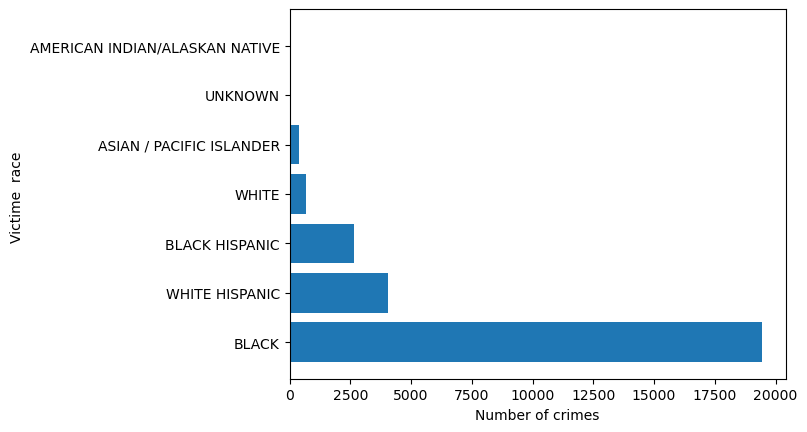

In [74]:
# Count the number of times each continent occurs
Victimerace_counts = NYC_df["VIC_RACE"].value_counts()
# Plot the results
plt.barh(Victimerace_counts.index, Victimerace_counts.values)
plt.xlabel("Number of crimes")
plt.ylabel("Victime  race ")

# Show the plot
plt.show()

# TWO VARIABLE ANALYSIS

##### 1. race of the vict vs sec of the perpector, 2. Location vs sex and race both victime and per, 3. age bracked vs sex of both victm and perpector 4. Plot location and number of crime per location

In [82]:
NYC_df = NYC_df[NYC_df['Latitude'].notna()]

In [85]:
NYC_df.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,...,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,228798151,05/27/2021,21:30:00,QUEENS,NaN,105,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1.058925e+06,180924.000000,40.662965,-73.730839,POINT (-73.73083868899994 40.662964620000025)
1,137471050,06/27/2014,17:40:00,BRONX,NaN,40,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1.005028e+06,234516.000000,40.810352,-73.924942,POINT (-73.92494232599995 40.81035186300006)
2,147998800,11/21/2015,03:56:00,QUEENS,NaN,108,0.0,NaN,NaN,True,...,NaN,NaN,25-44,M,WHITE,1.007668e+06,209836.531250,40.742607,-73.915492,POINT (-73.91549174199997 40.74260663300004)
3,146837977,10/09/2015,18:30:00,BRONX,NaN,44,0.0,NaN,NaN,False,...,NaN,NaN,<18,M,WHITE HISPANIC,1.006537e+06,244511.140625,40.837782,-73.919457,POINT (-73.91945661499994 40.83778200300003)
4,58921844,02/19/2009,22:58:00,BRONX,NaN,47,0.0,NaN,NaN,True,...,M,BLACK,45-64,M,BLACK,1.024922e+06,262189.406250,40.886238,-73.852910,POINT (-73.85290950899997 40.88623791800006)


In [86]:
crime_locations = list(zip(NYC_df.Latitude,NYC_df.Longitude))
base_map = folium.Map(location=[40.71427, -74.00597], zoom_start =10)
heatmap= plugins.HeatMap(crime_locations, radius=5, blur=2)
base_map.add_child(heatmap)